In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
df = pd.read_csv('Churn_Modelling1.csv', sep = ';')
df['Gender']= df['Gender'].map({'Male':0, 'Female':1})
features_names = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 
                  'IsActiveMember', 'EstimatedSalary']
geography_cols = pd.get_dummies(df["Geography"], dtype=int)
X = pd.concat([df[features_names], geography_cols], axis = 1)
y = df['Exited']

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### KNeighborsClassifier (Классификация ближайших соседей)

In [118]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))

train accuracy:  0.815820895522388
test accuracy:  0.769090909090909


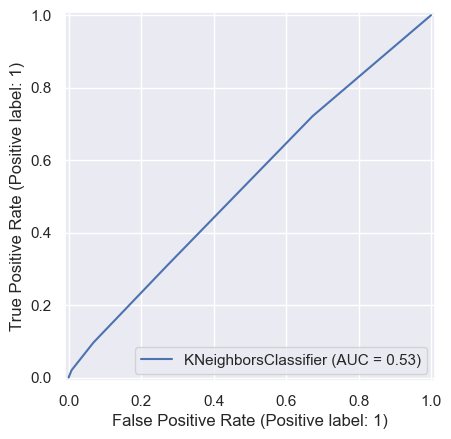

In [119]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(knn, X_test, y_test)

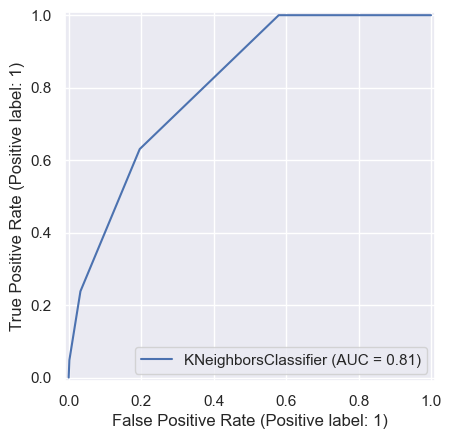

In [122]:
svc_disp = RocCurveDisplay.from_estimator(knn, X_train, y_train)

In [124]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_test_predict, average='macro')

0.5141505375337074

#### Один из способов сравнения классификаторов предусматривает измере­ние площади под кривой (англ. Area Under the Curve — AUC). Безупречный клас­сификатор будет иметь площадь под ROC-кривой (ROC-AUC), равную 1, тогда как чисто случайный классификатор - площадь 0.5.

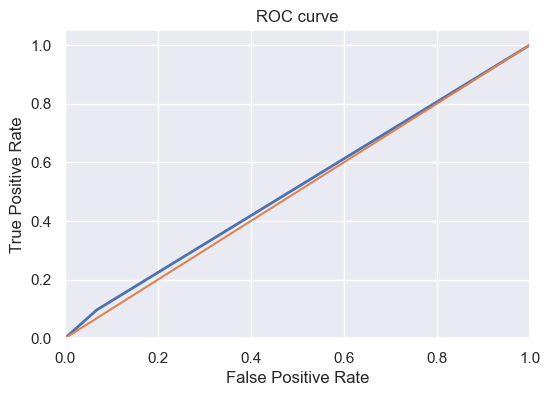

In [127]:
from matplotlib.pylab import rc, plot
from sklearn.metrics import roc_curve

sns.set(font_scale=1)
sns.set_color_codes("muted")

plt.figure(figsize=(6, 4))
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

### Вывод
На мой взяляд метод KNeighborsClassifier не плох при нескольких услвоиях: 
1. При небольшом количестве данных.
2. При равномерном распроделении данных.
3. При не смешенных данных.


Иначе метод не будет очень хорошо справлятся.
В данном случае он плохо справляется и не подходит для этого датасета.

### Gaussian Naive Bayes (НАИВНЫЙ БАЙЕСОВСКИЙ КЛАССИФИКАТОР)

In [131]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
gnb = GaussianNB()
gnb.fit(X, y)
gnb_pred_test = gnb.predict(X_test)

In [133]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, gnb_pred_test)

0.793939393939394

In [135]:
gnb_y_train_predict = gnb.predict(X_train)
gnb_y_test_predict = gnb.predict(X_test)

print('train accuracy: ', accuracy_score(y_train, gnb_y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, gnb_y_test_predict, normalize=True))

train accuracy:  0.7816417910447762
test accuracy:  0.793939393939394


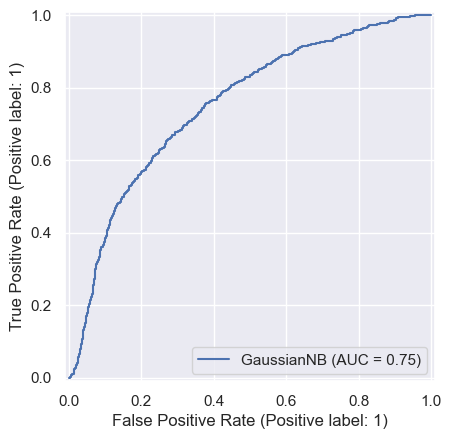

In [137]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(gnb, X_test, y_test)

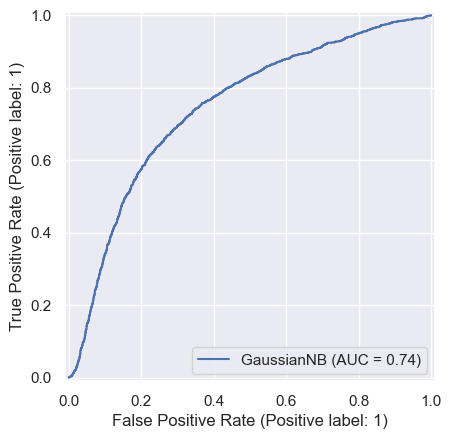

In [138]:
svc_disp = RocCurveDisplay.from_estimator(gnb, X_train, y_train)

In [140]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, gnb_y_test_predict, average='macro')

0.5230978237011188

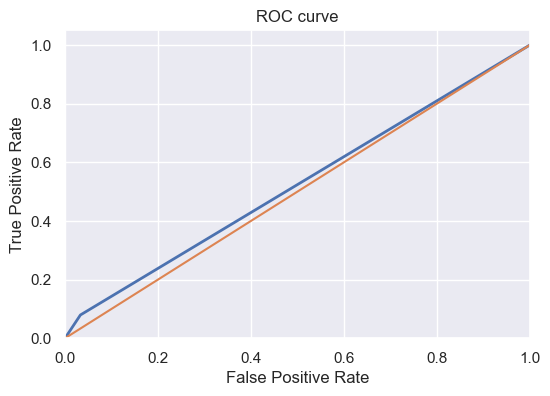

In [143]:
from matplotlib.pylab import rc, plot
from sklearn.metrics import roc_curve

sns.set(font_scale=1)
sns.set_color_codes("muted")

plt.figure(figsize=(6, 4))
fpr, tpr, thresholds = roc_curve(y_test, gnb_y_test_predict, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

### Вывод
На мой взяляд метод GaussianNB не плох при нескольких услвоиях: 
1. При равномерном распроделении данных.
2. При незавимсемых данных.


Иначе метод не будет очень хорошо справлятся.
В данном случае он не плохо справляется, но и не отлично.
Максимально логичен, работает по вероятности того что объект принадлжеит тому или иному классу.
Из-за проблемы зависимости данных друг от друга может путать классы и переобучаться или наоборот.
Он средне подходит для этого датасета.

### Random Forest Classifier (Классификатор дерева решений)

In [147]:
from sklearn.ensemble import RandomForestClassifier
rfc  = RandomForestClassifier(criterion = 'gini',
                                    n_estimators = 100,
                                    max_depth = 9,
                                    random_state = 42,
                                    n_jobs = -1)

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [148]:
rfc_y_train_predict = rfc.predict(X_train)
rfc_y_test_predict = rfc.predict(X_test)

print('train accuracy: ', accuracy_score(y_train, rfc_y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, rfc_y_test_predict, normalize=True))

train accuracy:  0.8916417910447761
test accuracy:  0.8712121212121212


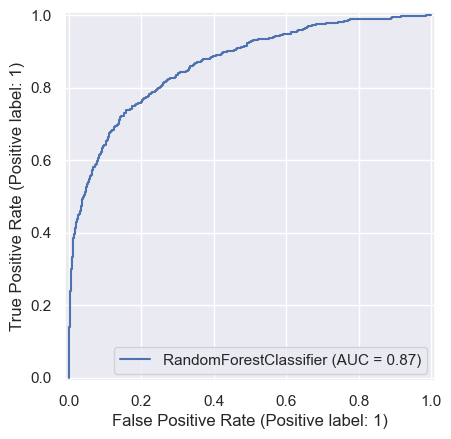

In [151]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test)

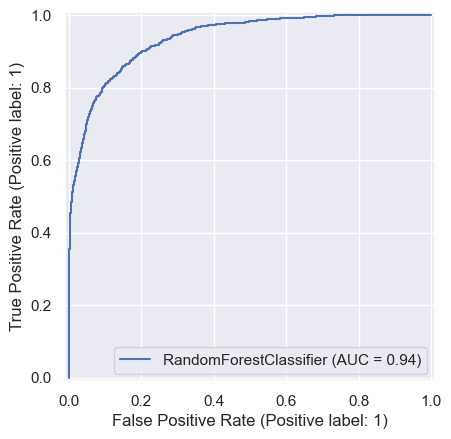

In [152]:
svc_disp = RocCurveDisplay.from_estimator(rfc, X_train, y_train)

In [154]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, rfc_y_test_predict, average='macro')

0.7107774820583089

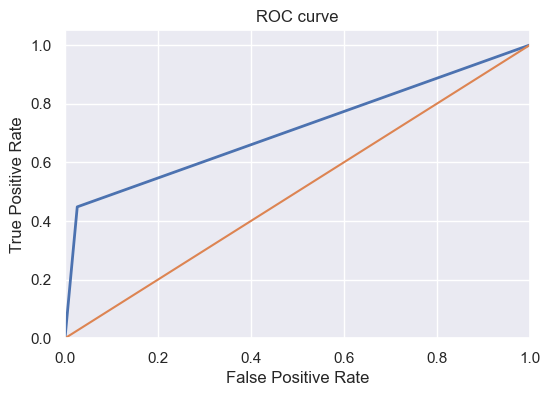

In [157]:
from matplotlib.pylab import rc, plot
from sklearn.metrics import roc_curve

sns.set(font_scale=1)
sns.set_color_codes("muted")

plt.figure(figsize=(6, 4))
fpr, tpr, thresholds = roc_curve(y_test, rfc_y_test_predict, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

### Вывод
На мой взяляд метод RandomForestClassifier не плох при нескольких услвоиях: 
1. При большом количестве времени.
2. При не слишком больших объемых данных.


Иначе метод будет долго справлятся.
В данном случае он отлично справляется.
Максимально логичен, работает по разбиению признаков.
Мне он понравился больше всего.
Он очень подходит для данного датасета.

### Logistic Regression (Логистическая регрессия)

In [161]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)

C:\Users\EvaRiss_\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [163]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
lr_y_train_predict = lr.predict(X_train)
lr_y_test_predict = lr.predict(X_test)
print('train accuracy: ', accuracy_score(y_train, lr_y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, lr_y_test_predict, normalize=True))

train accuracy:  0.7937313432835821
test accuracy:  0.8078787878787879


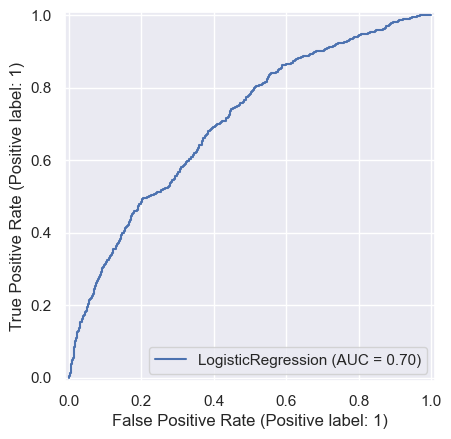

In [165]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(lr, X_test, y_test)

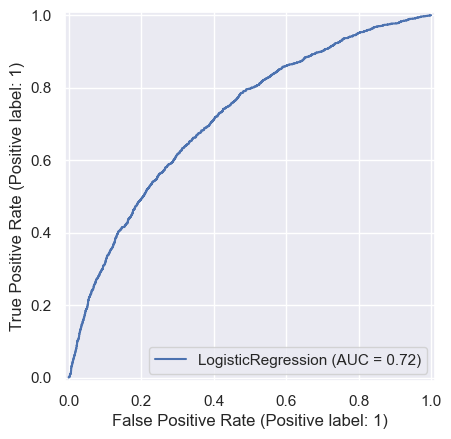

In [166]:
svc_disp = RocCurveDisplay.from_estimator(lr, X_train, y_train)

In [168]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, lr_y_test_predict, average='macro')

0.553562847280958

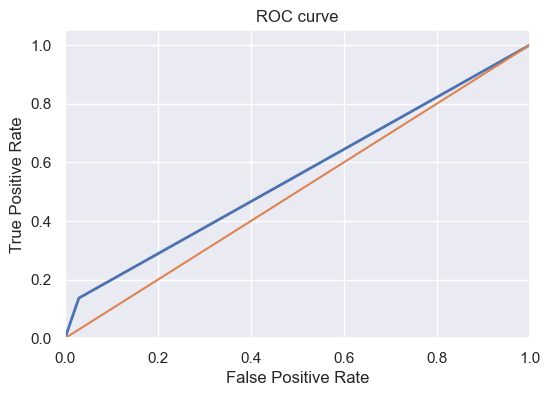

In [171]:
from matplotlib.pylab import rc, plot
from sklearn.metrics import roc_curve

sns.set(font_scale=1)
sns.set_color_codes("muted")

plt.figure(figsize=(6, 4))
fpr, tpr, thresholds = roc_curve(y_test, lr_y_test_predict, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

### Вывод
На мой взяляд метод LogisticRegression не плох при нескольких услвоиях: 
1. При небольшом количестве данных.
2. При не слишком большом количесве признаков.


Иначе метод будет не очень хорошо справлятся.
В данном случае он плохо справляется и не подходит для этого датасета.